### Overview of the clinical problem

Degenerative spine conditions adversely affect people’s quality of life. Detecting these conditions is crucial for determining therapeutic plans for patients. Therefore, it is essential to develop methods for detecting and assessing the severity of degenerative spine conditions on imaging.
 
This challenge primarily focuses on identifying three types of conditions in the lumbar region of the spine (refer below for the anatomical overview). The three conditions we aim to assess are:
 
1. Foraminal narrowing (on either the left or right foramen at a specified level).
2. Subarticular stenosis (on either the left or right side at a specified level).
3. Canal stenosis (only at a specified level).
 
Each of these conditions can manifest at various levels within the spine itself, specifically at each vertebral disc (e.g., L4/5 corresponds to the vertebral disc between the L4 and L5 vertebral bodies).


For each of the conditions, you'll need to predict whether the degree of compression is normal/mild, moderate, or severe. You can refer to the example test submission `sample_submission.csv` to get a better idea for what we're looking for in terms of output. For each case, you'll have to output a score from 0 to 1 representing the probability of the patient having a specific grade (`normal_mild`, `moderate`, `severe`), at the spinal level (`l1_l2`, `l2_l3`, `l3_l4`, `l4_l5`, `l5_s1`), for that condition (`spinal_canal_stenosis`, `left_neural_foraminal_narrowing`, `right_neural_foraminal_narrowing`, `left_subarticular_stenosis`, `right_subarticular_stenosis`):


Let's talk a bit about the anatomy to get a sense for what we're asking you all to detect.

### Anatomical Overview

The spine is divided into four regions: the cervical region (with 7 vertebral bodies), the thoracic region (with 12 vertebral bodies), the lumbar region (with 5 vertebral bodies), and the sacral region (with 3-5 fused vertebral bodies). 

<img src="https://prod-images-static.radiopaedia.org/images/53655832/Gray-square.001_big_gallery.jpeg" width=400/>

*From [Radiopedia](https://prod-images-static.radiopaedia.org/images/53655832/Gray-square.001_big_gallery.jpeg)*

Between each vertebral body in all of the regions (except the sacrum) is a vertebral disc. Furthermore, along the posterior aspect of each vertebral body lies the spinal cord. At each vertebral body, spinal nerves leave the spinal cord through openings between vertebral bodies called foramina.

<img src="https://files.miamineurosciencecenter.com/media/filer_public_thumbnails/filer_public/78/1e/781e78be-8980-466f-8a82-83a5c8350770/herniated_disc_larger.jpg__720.0x600.0_q85_subject_location-360%2C300_subsampling-2.jpg" width=400/>  

*From [Miami Neuroscience Center](https://miamineurosciencecenter.com/en/conditions/herniated-disc/)*

Compression of the spinal cord or any of the nerves can cause pain to patients. Things that can cause compression of these nerves/the spinal cord include a bulging vertebral disc, degenerative changes in the bones itself (leading them to grow protrusions/become compressed), trauma, or thickening of the ligaments surrounding the spinal cord.

### Foraminal Narrowing Overview

The spinal cord has spinal nerves that exit the spinal canal through openings called foramina. The foramina are best viewed in the sagittal plane. Sometimes these openings can become compressed, resulting in foraminal narrowing. This compression results in pain for patients along the nerve distribution that is downstream of the compression. 

On the left, the image shows a sagittal MR slice where the foramina are visible. Crosshairs show where the foramina exit the spinal canal. On the right, the image shows our grading criteria for designating the degree of compression (note for this challenge, Normal/Mild is one label).
<p float="middle">
<img src="https://i.imgur.com/6c7erNM.png" width=300/>
<img src="https://i.imgur.com/b1VGiN5.png" width=300/>
</p>

### Subarticular Stenosis Overview

Subarticular stenosis is due to compression of the spinal cord in the subarticular zone (this compression can be best visualized in the axial plane).

On the left is a schematic showing the relevant anatomical zone. On the right is our grading criteria for designating the degree of subarticular stenosis (normal/mild is collapsed into one label for this challenge). 
<p float="middle">
<img src="https://files.miamineurosciencecenter.com/media/filer_public_thumbnails/filer_public/d5/08/d508ae6a-a4f2-4796-be9f-455f8df45fe1/herniation_zones.jpg__1700.0x1308.0_q85_subject_location-850%2C656_subsampling-2.jpg" width=300/>
<img src="https://i.imgur.com/Usuxgge.png" width=300/>
</p>

*Left image from [Miami Neuroscience Center](https://miamineurosciencecenter.com/en/conditions/herniated-disc/)*


### Canal Stenosis Overview

Canal stenosis is impingement on the spinal canal (where the spinal cord travels). Impingement can be due to a bulging vertebral disc, trauma, bony osteophytes (outgrowths of the vertebral bodies due to degenerative changes), or ligamental thickening (of the ligaments that run along the length of the spinal canal). The degree of compression is best assessed in the axial plane.

On the left, we show canal stenosis visible in the sagittal plane (to give an overview of what it looks like). On the right, we show our canal stenosis grading criteria (normal/mild are collapsed into one label). 

<p float="middle">
<img src="https://prod-images-static.radiopaedia.org/images/940993/f7a8adca63efae788f621869cc21e8_big_gallery.jpg" width=300/>
<img src="https://i.imgur.com/opjnAwl.png" width=300/>
</p>

*From [Radiopedia](https://prod-images-static.radiopaedia.org/images/940993/f7a8adca63efae788f621869cc21e8_big_gallery.jpg)*

### Imaging Overview

MRI imaging of the spine can be taken in three planes: the axial plane, the sagittal plane, and the coronal plane. The two main image types you'll need for this challenge are the axial and sagittal planes. The axial plane takes images horizonal slices (perpendicular to the spine) across the body from top to bottom. The sagittal plane takes vertical slices (parallel to the spine) going from left to right. 

MRI images come in multiple variants. They can generally be classified as either being T1 weighted or T2 weighted. T1 weighted images show fat as being brighter. The inner part of bones would appear brighter on T1 images. T2 images show water as brighter. The spinal canal would appear as brighter on T2 images. MRI images are not standardized with regards to the pixel values that are output from it (unlike CT images). So you'll need to figure out how to standardize these images (or maybe you wont need to at all, we'll leave it up to you). 

## Step 1: Environment Setup
* Ensure you have the necessary libraries installed. 
* If not, install them using the following commands:


In [1]:
#pip install tensorflow pandas matplotlib opencv-python

## Step 2: Import Libraries
* Import the necessary libraries for data processing and visualization.

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import polars as pl

# Expected Directory Structure for Running This Notebook
* To execute this notebook smoothly, ensure the following directory structure is set up in your working environment:

# Dataset Directory

* This directory should contain all necessary datasets required for training and evaluation.
Ensure it includes subdirectories for both training and testing data, each organized by study IDs and series IDs.
Key files such as train.csv, test.csv, train_label_coordinates.csv, and series_descriptions.csv should be present for data annotation and exploration.

In [16]:
def print_directory_tree(directory, depth=3, indent_size=4):
    """
    We use recursive search to traverse the structure and print the directory tree structure up to a specified depth,
    and skips printing 'train_images' and 'test_images'.

    :param directory: The directory to print.
    :param depth: The maximum depth to print.
    :param indent_size: The number of spaces to indent for each level.
    """
    print(f"{directory}")
    print_tree(directory, '', depth, indent_size)

    
def print_tree(directory, prefix, depth, indent_size):
    if depth <= 0:
        return

    files = os.listdir(directory)
    files.sort()
    for i, file in enumerate(files):
        full_path = os.path.join(directory, file)
        last = i == (len(files) - 1)
        if os.path.isdir(full_path):
            if full_path.endswith('/train_images') or full_path.endswith('/test_images'):
                continue  # Skip printing train_images and test_images
            print(f"{prefix}{'├── ' if not last else '└── '}{file}")
            print_tree(full_path, prefix + ('│   ' if not last else '    '), depth - 1, indent_size)
        else:
            print(f"{prefix}{'├── ' if not last else '└── '}{file}")

# Define the root directory to start the listing
root_directory = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification'


# Print the directory tree structure up to depth 3, skipping train_images and test_images
print_directory_tree(root_directory, depth=3)

/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification
├── sample_submission.csv
├── test_series_descriptions.csv
├── train.csv
├── train_label_coordinates.csv
└── train_series_descriptions.csv


## Step 3: Load the Data

In [17]:
# Define file paths
data_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/'

train_images_dir = os.path.join(data_dir, 'train_images')
test_images_dir = os.path.join(data_dir, 'test_images')

train_csv = os.path.join(data_dir, 'train.csv')
train_label_coordinates_csv = os.path.join(data_dir, 'train_label_coordinates.csv')
train_series_descriptions_csv = os.path.join(data_dir, 'train_series_descriptions.csv')
test_series_descriptions_csv = os.path.join(data_dir, 'test_series_descriptions.csv')
sample_submission_csv = os.path.join(data_dir, 'sample_submission.csv')

# Load CSV files
train_df = pd.read_csv(train_csv)
train_label_coords_df = pd.read_csv(train_label_coordinates_csv)
train_series_desc_df = pd.read_csv(train_series_descriptions_csv)
test_series_desc_df = pd.read_csv(test_series_descriptions_csv)
sample_submission_df = pd.read_csv(sample_submission_csv)

In [18]:
print("\nTraining Dataframe:")
train_df.head()


Training Dataframe:


,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [19]:
print("\nTraining Series Descriptors:")
test_series_desc_df.head(5)


Training Series Descriptors:


,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


In [20]:
print("\nTraining Labels:")
train_label_coords_df.head()


Training Labels:


,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [22]:
tr = "The Length of Train:", len(train_df)
tsd = "The Length of train_series_desc_df:", len(train_series_desc_df)
trl = "The Length of train_label_coords_df:", len(train_label_coords_df)

print(tr)
print(tsd)
print(trl)

('The Length of Train:', 1975)
('The Length of train_series_desc_df:', 6294)
('The Length of train_label_coords_df:', 48692)


# Step 4: Explore the Data
Explore the structure and basic statistics of the loaded dataframes.

In [147]:
train_series_desc_df['series_description'].value_counts()

series_description
Axial T2            2340
Sagittal T1         1980
Sagittal T2/STIR    1974
Name: count, dtype: int64

In [148]:
train_label_coords_df['condition'].value_counts()

condition
Left Neural Foraminal Narrowing     9860
Right Neural Foraminal Narrowing    9859
Spinal Canal Stenosis               9753
Right Subarticular Stenosis         9612
Left Subarticular Stenosis          9608
Name: count, dtype: int64

In [25]:
train_label_coords_df['level'].value_counts()

level
L3/L4    9858
L4/L5    9858
L5/S1    9845
L2/L3    9661
L1/L2    9470
Name: count, dtype: int64

# Step 5: Explore the Data for a Single Series Id:
Explore the structure and basic statistics of the loaded dataframes.

In [152]:
# Check unique instance numbers in the filtered DataFrame
unique_instances = train_label_coords_df['instance_number'].unique()
print("Unique instance numbers in merged_df2:", unique_instances)

# Check for missing instance numbers
expected_instances = set(range(1, 61))  # Instances from 1 to 60
missing_instances = expected_instances - set(unique_instances)
print("Missing instance numbers:", missing_instances)


Unique instance numbers in merged_df2: [   8    4    5    6   11   12    3   19   28   35   15   16   22   29
   34   40    7   17    9   10    1    2   20   21   13   27   33   18
   25   39   14   24   42   37   38   45   46   23   26   43   44   52
   53   31   48   30   36   32   47   55   56   41   51   57   58   59
   83  106   61   84  110  134   49   50   54   73   96  118   78   80
  102  103  123  126   60   82   85  132   74  100  124   70   95  119
   72  121   62   69   91  115   99  108  109  133 5031 5039 5046   76
   98   94  117]
Missing instance numbers: set()


In [121]:
merged_df1 = train_label_coords_df[train_label_coords_df['study_id']==100206310]
len(merged_df1)

25

In [140]:
merged_df1 = train_label_coords_df[train_label_coords_df['series_id']==2092806862]
merged_df1.head(15)#100206310


,study_id,series_id,instance_number,condition,level,x,y
1127,100206310,2092806862,4,Right Neural Foraminal Narrowing,L4/L5,253.393075,278.680244
1128,100206310,2092806862,4,Right Neural Foraminal Narrowing,L5/S1,252.350305,320.391039
1129,100206310,2092806862,5,Right Neural Foraminal Narrowing,L3/L4,252.350305,235.926680
1130,100206310,2092806862,6,Right Neural Foraminal Narrowing,L1/L2,265.906314,146.248473
1131,100206310,2092806862,6,Right Neural Foraminal Narrowing,L2/L3,256.521385,186.916497
1132,100206310,2092806862,12,Left Neural Foraminal Narrowing,L2/L3,260.177602,191.705532
1133,100206310,2092806862,12,Left Neural Foraminal Narrowing,L4/L5,249.241774,274.786914
1134,100206310,2092806862,12,Left Neural Foraminal Narrowing,L5/S1,258.806490,319.853318
1135,100206310,2092806862,13,Left Neural Foraminal Narrowing,L1/L2,270.342250,148.221459
1136,100206310,2092806862,13,Left Neural Foraminal Narrowing,L3/L4,250.176889,234.398551


In [61]:
import pandas as pd

# Assuming merged_df1 is already defined and imported
merged_df2 = train_label_coords_df[train_label_coords_df['series_id'] == 1012284084]

# Group by the 'condition' attribute
grouped = merged_df2.groupby('condition')

# Display the first few rows of each group
for name, group in grouped:
    print(f"Condition: {name}")
    print(group.head())  # You can adjust the number of rows to display by changing the parameter in head()
    print("\n")


Condition: Left Subarticular Stenosis
       study_id   series_id  instance_number                   condition  \
1112  100206310  1012284084               20  Left Subarticular Stenosis   
1114  100206310  1012284084               28  Left Subarticular Stenosis   
1116  100206310  1012284084               37  Left Subarticular Stenosis   
1118  100206310  1012284084               46  Left Subarticular Stenosis   
1120  100206310  1012284084               55  Left Subarticular Stenosis   

      level           x           y  
1112  L1/L2  180.355677  165.034200  
1114  L2/L3  177.729138  160.218878  
1116  L3/L4  173.351573  158.467852  
1118  L4/L5  168.536252  156.279070  
1120  L5/S1  167.660739  157.154583  


Condition: Right Subarticular Stenosis
       study_id   series_id  instance_number                    condition  \
1113  100206310  1012284084               20  Right Subarticular Stenosis   
1115  100206310  1012284084               28  Right Subarticular Stenosis   
1117 

In [77]:
# Create an empty DataFrame to store the results
grouped_df = pd.DataFrame()

# Iterate over each group and concatenate the first few rows to the grouped_df
for name, group in grouped:
    grouped_df = pd.concat([grouped_df, group.head(50)])  # You can adjust the number of rows to display by changing the parameter in head()
    grouped_df.head()



In [130]:
# Check unique instance numbers in the filtered DataFrame
unique_instances = merged_df2['instance_number'].unique()
print("Unique instance numbers in merged_df2:", unique_instances)

# Check for missing instance numbers
expected_instances = set(range(1, 61))  # Instances from 1 to 60
missing_instances = expected_instances - set(unique_instances)
print("Missing instance numbers:", missing_instances)


Unique instance numbers in merged_df2: []
Missing instance numbers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}


No annotations for 1.dcm
No annotations for 2.dcm
No annotations for 3.dcm
No annotations for 4.dcm
No annotations for 5.dcm
No annotations for 6.dcm
No annotations for 7.dcm
No annotations for 8.dcm
No annotations for 9.dcm
No annotations for 10.dcm
No annotations for 11.dcm
No annotations for 12.dcm
No annotations for 13.dcm
No annotations for 14.dcm
No annotations for 15.dcm
No annotations for 16.dcm
No annotations for 17.dcm
No annotations for 18.dcm
No annotations for 19.dcm


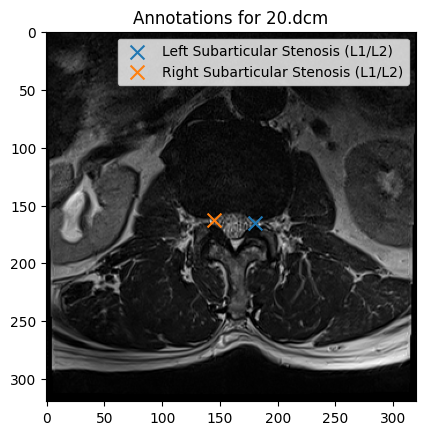

No annotations for 21.dcm
No annotations for 22.dcm
No annotations for 23.dcm
No annotations for 24.dcm
No annotations for 25.dcm
No annotations for 26.dcm
No annotations for 27.dcm


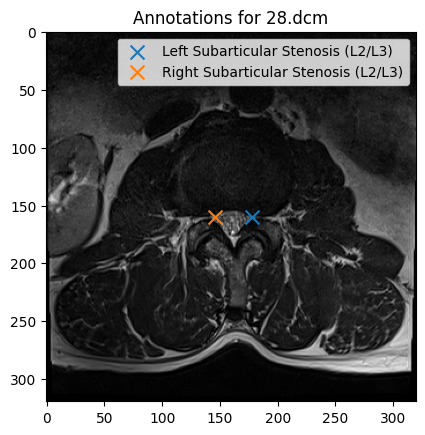

No annotations for 29.dcm
No annotations for 30.dcm
No annotations for 31.dcm
No annotations for 32.dcm
No annotations for 33.dcm
No annotations for 34.dcm
No annotations for 35.dcm
No annotations for 36.dcm


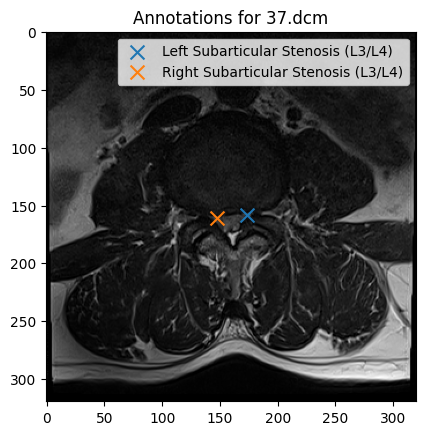

No annotations for 38.dcm
No annotations for 39.dcm
No annotations for 40.dcm
No annotations for 41.dcm
No annotations for 42.dcm
No annotations for 43.dcm
No annotations for 44.dcm
No annotations for 45.dcm


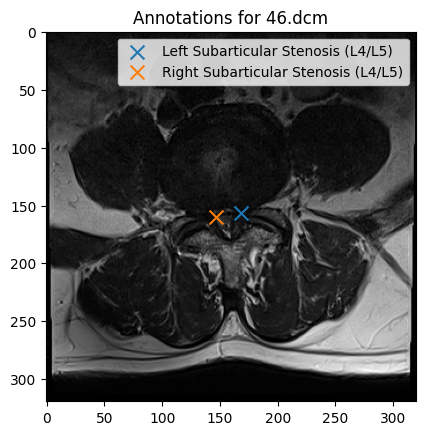

No annotations for 47.dcm
No annotations for 48.dcm
No annotations for 49.dcm
No annotations for 50.dcm
No annotations for 51.dcm
No annotations for 52.dcm
No annotations for 53.dcm
No annotations for 54.dcm


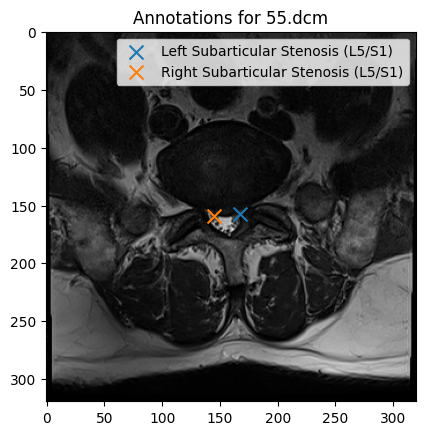

No annotations for 56.dcm
No annotations for 57.dcm
No annotations for 58.dcm
No annotations for 59.dcm
No annotations for 60.dcm
Image 61.dcm does not exist
Image 62.dcm does not exist
Image 63.dcm does not exist
Image 64.dcm does not exist
Image 65.dcm does not exist
Image 66.dcm does not exist
Image 67.dcm does not exist
Image 68.dcm does not exist
Image 69.dcm does not exist
Image 70.dcm does not exist
Image 71.dcm does not exist
Image 72.dcm does not exist
Image 73.dcm does not exist
Image 74.dcm does not exist
Image 75.dcm does not exist
Image 76.dcm does not exist
Image 77.dcm does not exist
Image 78.dcm does not exist
Image 79.dcm does not exist
Image 80.dcm does not exist
Image 81.dcm does not exist
Image 82.dcm does not exist
Image 83.dcm does not exist
Image 84.dcm does not exist
Image 85.dcm does not exist
Image 86.dcm does not exist
Image 87.dcm does not exist
Image 88.dcm does not exist
Image 89.dcm does not exist
Image 90.dcm does not exist
Image 91.dcm does not exist
Im

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import os


# Directory path where your images are stored
image_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/100206310/1012284084'
x = len(image_dir)

# Function to plot annotations on an image
def plot_annotations(image_path, annotations):
    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    
    # Plot each annotation
    for _, row in annotations.iterrows():
        plt.scatter(row['x'], row['y'], label=f"{row['condition']} ({row['level']})", s=100, marker='x')
    
    plt.legend(loc='best')
    plt.title(f'Annotations for {os.path.basename(image_path)}')
    plt.show()

# Iterate over all expected instance numbers and plot annotations if they exist
for instance_number in range(1, x):
    annotations = merged_df1[merged_df1['instance_number'] == instance_number]
    image_path = os.path.join(image_dir, f"{instance_number}.dcm")
    
    if os.path.exists(image_path):
        if not annotations.empty:
            plot_annotations(image_path, annotations)
        else:
            print(f"No annotations for {instance_number}.dcm")
    else:
        print(f"Image {instance_number}.dcm does not exist")


No annotations for 1.dcm
No annotations for 2.dcm
No annotations for 3.dcm
No annotations for 4.dcm
No annotations for 5.dcm
No annotations for 6.dcm
No annotations for 7.dcm
No annotations for 8.dcm


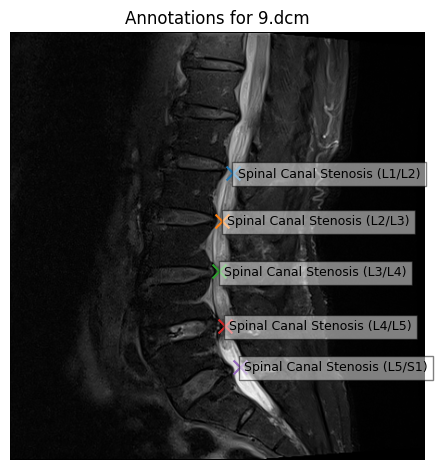

No annotations for 10.dcm
No annotations for 11.dcm
No annotations for 12.dcm
No annotations for 13.dcm
No annotations for 14.dcm
No annotations for 15.dcm
No annotations for 16.dcm
No annotations for 17.dcm
No annotations for 18.dcm


In [125]:
# Function to plot annotations on an image
def plot_annotations(image_path, annotations):
    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    
    # Plot each annotation
    for _, row in annotations.iterrows():
        plt.scatter(row['x'], row['y'], s=100, marker='x')
        plt.text(row['x'] + 5, row['y'] + 5, f"{row['condition']} ({row['level']})", fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.5))

    # Adjusting the plot
    plt.title(f'Annotations for {os.path.basename(image_path)}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Count the number of DICOM images in the directory
num_images = len([name for name in os.listdir(image_dir) if name.endswith('.dcm')])

# Iterate over all DICOM images and plot annotations if they exist
for instance_number in range(1, num_images + 1):
    annotations = merged_df1[merged_df1['instance_number'] == instance_number]
    image_path = os.path.join(image_dir, f"{instance_number}.dcm")
    
    if os.path.exists(image_path):
        if not annotations.empty:
            plot_annotations(image_path, annotations)
        else:
            print(f"No annotations for {instance_number}.dcm")
    else:
        print(f"Image {instance_number}.dcm does not exist")

Unique instance numbers in merged_df2: []
Missing instance numbers: {1, 2, 3, 4, 5, 6, 7, 8, 9}
No annotations for 1.dcm
No annotations for 2.dcm
No annotations for 3.dcm


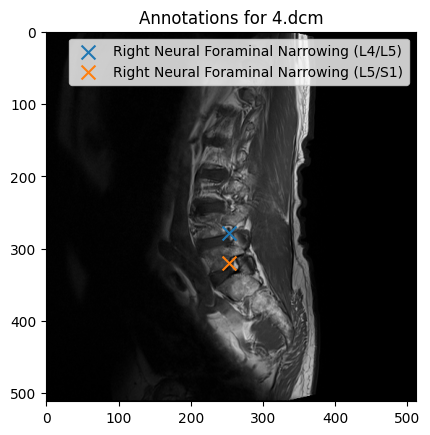

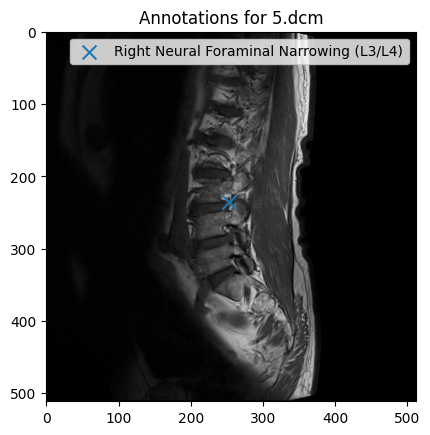

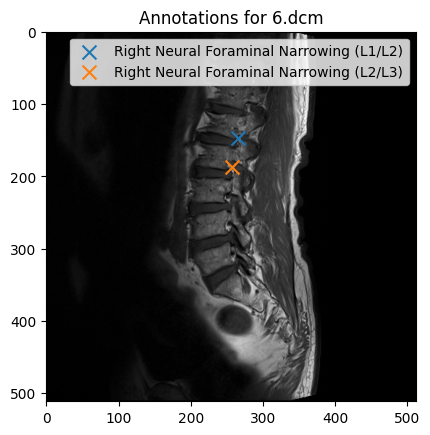

No annotations for 7.dcm
No annotations for 8.dcm
No annotations for 9.dcm
No annotations for 10.dcm
No annotations for 11.dcm


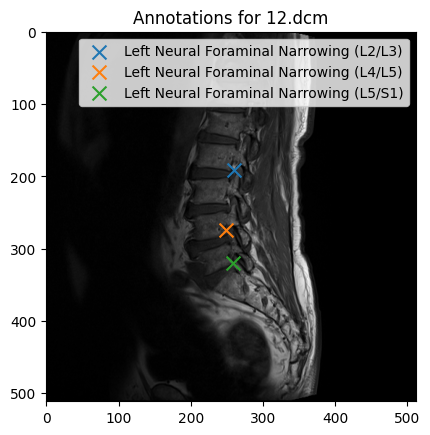

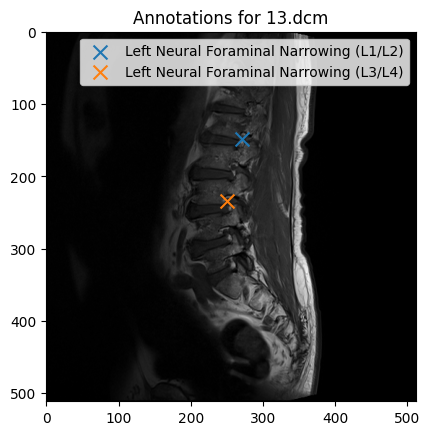

No annotations for 14.dcm
No annotations for 15.dcm
No annotations for 16.dcm
No annotations for 17.dcm
No annotations for 18.dcm
Image 19.dcm does not exist
Image 20.dcm does not exist
Image 21.dcm does not exist
Image 22.dcm does not exist
Image 23.dcm does not exist
Image 24.dcm does not exist
Image 25.dcm does not exist
Image 26.dcm does not exist
Image 27.dcm does not exist
Image 28.dcm does not exist
Image 29.dcm does not exist
Image 30.dcm does not exist
Image 31.dcm does not exist
Image 32.dcm does not exist
Image 33.dcm does not exist
Image 34.dcm does not exist
Image 35.dcm does not exist
Image 36.dcm does not exist
Image 37.dcm does not exist
Image 38.dcm does not exist
Image 39.dcm does not exist
Image 40.dcm does not exist
Image 41.dcm does not exist
Image 42.dcm does not exist
Image 43.dcm does not exist
Image 44.dcm does not exist
Image 45.dcm does not exist
Image 46.dcm does not exist
Image 47.dcm does not exist
Image 48.dcm does not exist
Image 49.dcm does not exist
Im

In [145]:
merged_df1 = train_label_coords_df[train_label_coords_df['series_id']==2092806862]
x=len(merged_df1)
# Function to plot annotations on an image
def plot_annotations(image_path, annotations):
    # Load the DICOM image
    ds = pydicom.dcmread(image_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    
    # Plot each annotation
    for _, row in annotations.iterrows():
        plt.scatter(row['x'], row['y'], label=f"{row['condition']} ({row['level']})", s=100, marker='x')
    
    plt.legend(loc='best')
    plt.title(f'Annotations for {os.path.basename(image_path)}')
    plt.show()

# Check unique instance numbers in the filtered DataFrame
unique_instances = merged_df2['instance_number'].unique()
print("Unique instance numbers in merged_df2:", unique_instances)

# Check for missing instance numbers
expected_instances = set(range(1, x))  # Instances from 1 to 60
missing_instances = expected_instances - set(unique_instances)
print("Missing instance numbers:", missing_instances)

# Iterate over all expected instance numbers and plot annotations if they exist
for instance_number in range(1, 61):
    annotations = merged_df1[merged_df1['instance_number'] == instance_number]
    image_path = os.path.join(image_dir, f"{instance_number}.dcm")
    
    if os.path.exists(image_path):
        if not annotations.empty:
            plot_annotations(image_path, annotations)
        else:
            print(f"No annotations for {instance_number}.dcm")
    else:
        print(f"Image {instance_number}.dcm does not exist")

# Step 6: Visualise the Data: